In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate, optimize
%matplotlib inline 
import math

In [104]:
def my_tabulation( arg, interp_coeff):
    all_fun = []
    all_a = []
    for i in range(len(arg)-1):
        a = np.linspace(arg[i], arg[i+1], num=3)
        fun = list(map(lambda x: pow(x, 3)*interp_coeff[i][0] + pow(x, 2)*interp_coeff[i][1] + x*interp_coeff[i][2]+ interp_coeff[i][3],a))
        all_a += list(a)[:2]
        all_fun += fun[:2]
    all_a += [list(a)[-1]]
    all_fun += [fun[-1]]
    plt.plot(all_a, all_fun, color='red', label = u'Spline')
    return all_fun


In [5]:
def linsys(A, F):
    #"Solve system A*x=F"
    x = []
    n = len(A)
    alpha = []
    beta = []
    alpha.append(-A[0][1]/A[0][0])
    beta.append(F[0]/A[0][0])
    for i in range(1, n-1):
        denom = A[i][i -1]*alpha[-1]+ A[i][i]
        alpha.append(-A[i][i + 1]/denom)
        beta.append((F[i + 1] - A[i][i -1]*beta[-1])/denom)
    x.append((F[-1] - A[n-1][n-2]*beta[-1])/(A[n-1][n-1] + A[n-1][n-2]*alpha[-1])) #alpha_n?
    
    for i in reversed(range(n-1)):
        x.append(alpha[i]*x[-1] + beta[i])
    return list(reversed(x))

In [121]:
def matrix_stat(matrix):
    stats = [np.linalg.det(matrix), np.linalg.norm(matrix),np.linalg.cond(matrix) ]
    print("Определитель: %d\nНорма: %d\nЧисло обусловленности: %d" % (stats[0], stats[1], stats[2]))
    return stats

In [214]:
def error(matrix, b):
    x = linsys(matrix, b)
    
    err = b - np.dot(matrix, x)

    return np.linalg.norm(err)

### Протестируем решение линейной системы уравнений:

In [211]:
A = np.array([[1000.0,1.0,0.0],[1.0,1000.0,1.0],[0.0,1.0,1000.0]])
b_1 = np.array([i for i in range(3)])
B = np.zeros((8, 8))
C = np.zeros((8, 8))
for i in range(0,7):
    B[i][i] = 1000
    C[i][i] = 0.1
    B[i][i+1] = 0.1
    B[i+1][i] = 0.1
    C[i][i+1] = 1000
    C[i+1][i] = 1000
B[7][7] = 1000
C[7][7] = 0.1
b_2 = np.array([1 for i in range(8)])

In [215]:
matrix_stat(A)
print(error(A, b_1))

Определитель: 999998000
Норма: 1732
Число обусловленности: 1
1.0


In [216]:
matrix_stat(B)
print(error(B, b_2))

Определитель: 999999929999994719830016
Норма: 2828
Число обусловленности: 1
3.33066907388e-16


In [217]:
matrix_stat(C)
print(error(C, b_2))

Определитель: 999999900000001955201024
Норма: 3741
Число обусловленности: 5
8.65285560819e-13


In [6]:
def interpolate(x, f):
    F = []
    n = len(x)-1
    theta = [x[i]-x[i-1] for i in range(1, len(x))]
    matrix = np.zeros((n-1, n-1))
    for i in range(n-2):
        matrix[i][i] = (theta[i]+theta[i+1])/3
        matrix[i][i+1] = theta[i+1]/6
        matrix[i+1][i] = theta[i+1]/6
    matrix[n-2][n-2] = (theta[n-2]+theta[n-1])/3
    
    b = np.array([(f[i+1]-f[i])/theta[i] - (f[i]-f[i-1])/theta[i-1] for i in range(1, n)])
    
    m = linsys(matrix, b)
    m = [0] + m + [0]
    
    
    A = [(f[i + 1] - f[i])/theta[i] - theta[i]*(m[i+1]-m[i])/6 for i in range(n)]
    B = [f[i] - m[i]*theta[i]*theta[i]/6 - A[i]*x[i] for i in range(n)]
    print(theta[i]/6*(m[i+1]-m[i]), theta[i])
    for i in range(n):
        new = [0,0,0,0]
        new[0] = 1/(6*theta[i])*(m[i+1] - m[i])
        new[1] = 1/(2*theta[i])*(m[i]*x[i+1] - x[i]*m[i+1])
        new[2] = 1/(6*theta[i])*(3*x[i]*x[i]*m[i+1] - 3*x[i+1]*x[i+1]*m[i]) + A[i]
        new[3] = B[i] + 1/(6*theta[i])*(m[i]*pow(x[i + 1],3) - m[i+1]*pow(x[i], 3))
        F.append(new)
        
    return F

In [220]:
def test_interpolate(fun, a, b, n, diff):
    arg = np.linspace(a, b, num=n)

    arg_real = np.linspace(a, b, num=2*n-1)
    real_func = list(map(lambda x:fun(x),arg))
    my_tab = my_tabulation(arg,interpolate(arg, real_func))
    real_func = list(map(lambda x:fun(x),arg_real))

    plt.plot(arg_real, real_func, color='grey', alpha=0.8, label = u'f(x)')
    plt.xlabel(u'x')
    plt.ylabel(u'y')
    plt.title('n = ' + str(n))
    plt.legend()
    plt.show()
    if diff:
        plt.plot(arg_real, np.array(real_func) - np.array(my_tab))
        plt.title(u"Error: f(x) - S(x)")


-0.083857442348 2.77777777778


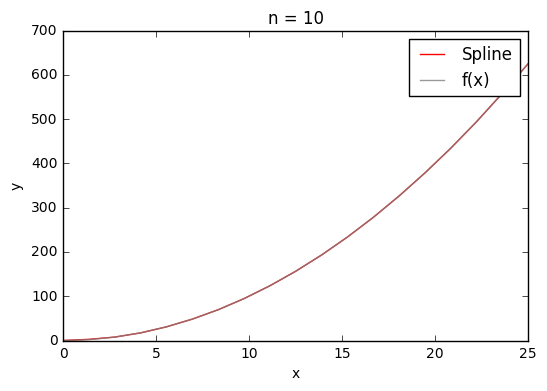

In [221]:
test_interpolate(lambda x: x*x, 0, 25.0, 10, False)

-0.0154820843864 0.510204081633


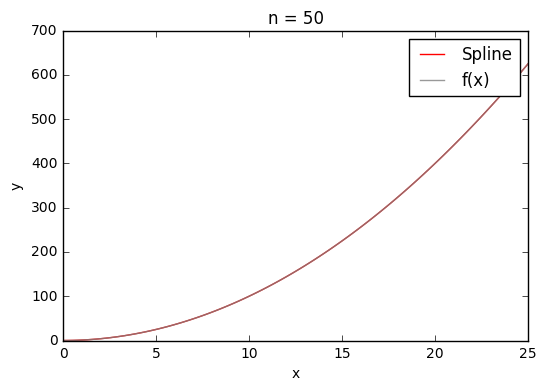

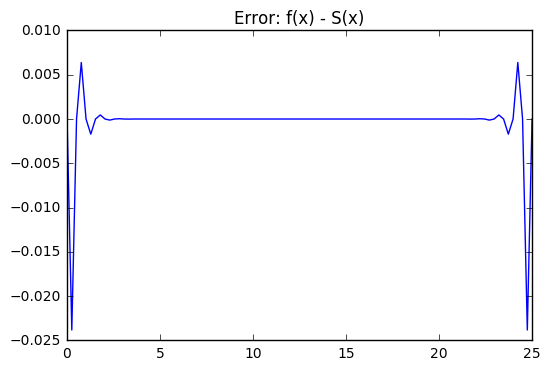

In [222]:
test_interpolate(lambda x: x*x, 0, 25.0, 50, True)

17.4677589821 0.204081632653


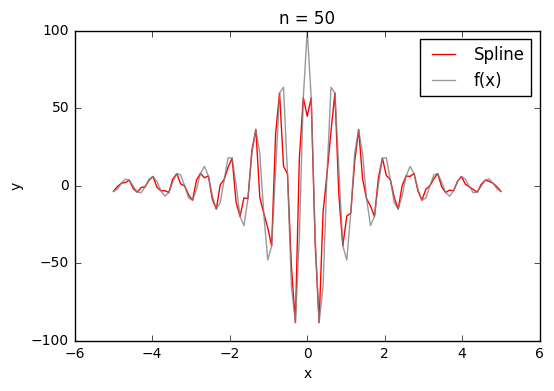

In [223]:
test_interpolate(lambda x: 100*np.cos(x*3*math.pi)/(x*x+1), -5, 5, 50, False)


6.49157332996 0.10101010101


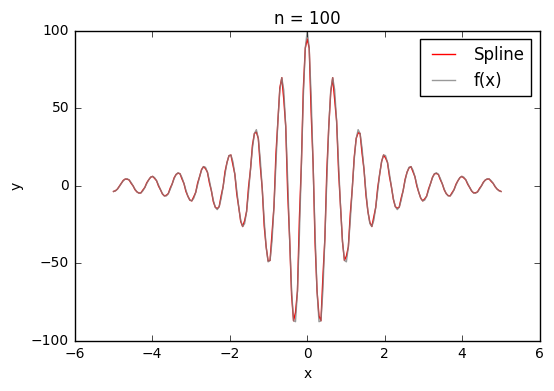

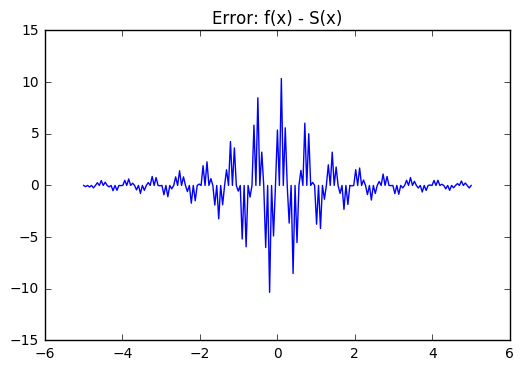

In [224]:
test_interpolate(lambda x: 100*np.cos(x*3*math.pi)/(x*x+1), -5, 5, 100, True)


In [63]:
def f3(x):
    if x < 1:
        return 3
    else:
        return 1

0.0249648061062 0.714285714286


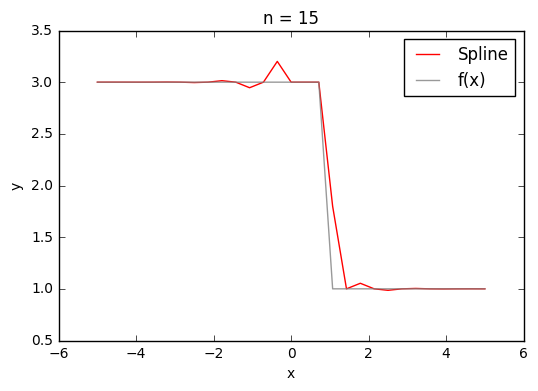

In [225]:
test_interpolate(f3, -5, 5, 15, False)

8.59271836137e-10 0.204081632653


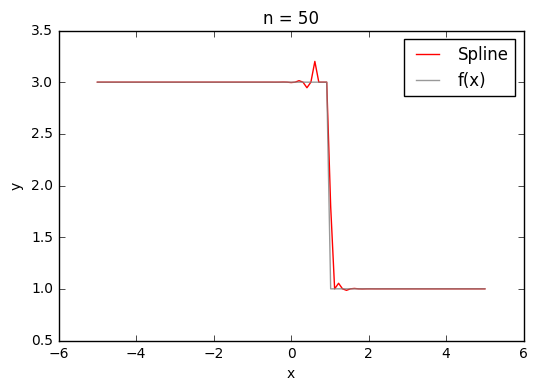

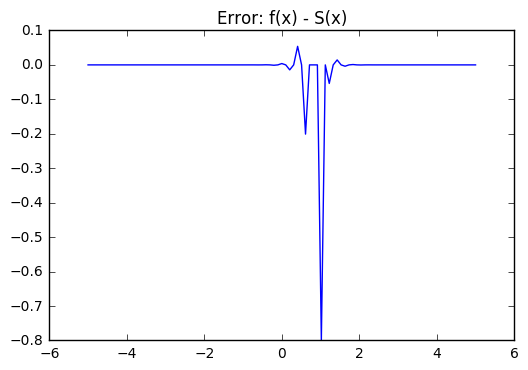

In [226]:
test_interpolate(f3, -5, 5, 50, True)